Links:
- https://github.com/hardmaru/WorldModelsExperiments
- http://blog.otoro.net//2018/06/09/world-models-experiments/


In [1]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn
from torchvision.transforms import Compose, ToTensor, ToPILImage
from torchsummary import summary
import vae
VAE = importlib.reload(vae).VAE
from dataset import VAEDataset
from torch.utils.data import DataLoader

from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = VAE().to(device)

In [3]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 31, 31]             196
              ReLU-2            [-1, 4, 31, 31]               0
            Conv2d-3            [-1, 8, 14, 14]             520
              ReLU-4            [-1, 8, 14, 14]               0
            Conv2d-5             [-1, 16, 6, 6]           2,064
              ReLU-6             [-1, 16, 6, 6]               0
            Conv2d-7             [-1, 32, 2, 2]           8,224
              ReLU-8             [-1, 32, 2, 2]               0
            Linear-9                   [-1, 32]           4,128
           Linear-10                   [-1, 32]           4,128
           Linear-11                  [-1, 128]           4,224
          Reshape-12            [-1, 128, 1, 1]               0
  ConvTranspose2d-13             [-1, 16, 5, 5]          51,216
             ReLU-14             [-1, 1

In [4]:
dataset = VAEDataset(transform=Compose([
        ToTensor()
    ]))

In [5]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

In [7]:
losses = []
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for i, batch in tqdm_notebook(enumerate(dataloader)):
    optimizer.zero_grad()
    original, decoded, encoded, z, mu, logvar = model.forward(batch)
    loss = model.loss(original, decoded, mu, logvar)
    losses.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

In [8]:
losses = np.array(losses)

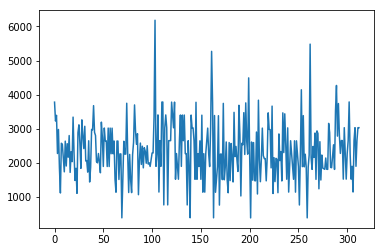

In [10]:
plt.plot(losses)

In [ ]:
model.loss(original, decoded, mu, logvar)

In [ ]:
temp = dataset[0].reshape((1, 3, 64, 64))
plt.imshow(model.forward(temp)[1][0].detach().numpy().transpose((1,2,0)))
plt.show()